In [1]:
import pandas as pd

df = pd.read_csv("/Users/markgranatire/Documents/flames-bdc-app/data/files/olympic_womens_dataset.csv")
df.head()
print(df.columns.tolist())

df = df.drop(["Clock", "Home Team Goals", "Away Team Goals", "X Coordinate 2", "Y Coordinate 2"], axis=1)
df['game_date'] = pd.to_datetime(df['game_date'])
df.head()

['game_date', 'Home Team', 'Away Team', 'Period', 'Clock', 'Home Team Skaters', 'Away Team Skaters', 'Home Team Goals', 'Away Team Goals', 'Team', 'Player', 'Event', 'X Coordinate', 'Y Coordinate', 'Detail 1', 'Detail 2', 'Detail 3', 'Detail 4', 'Player 2', 'X Coordinate 2', 'Y Coordinate 2']


,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Emily Clark,Faceoff Win,100,42,Backhand,NaN,NaN,NaN,Lyudmila Belyakova
1,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Meaghan Mikkelson,Puck Recovery,91,67,NaN,NaN,NaN,NaN,NaN
2,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Meaghan Mikkelson,Dump In/Out,106,81,Retained,NaN,NaN,NaN,NaN
3,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Meaghan Mikkelson,Zone Entry,106,81,Dumped,NaN,NaN,NaN,Liana Ganeyeva
4,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Olympic (Women) - Canada,Sarah Nurse,Puck Recovery,168,1,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24002 entries, 0 to 24001
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   game_date          24002 non-null  datetime64[ns]
 1   Home Team          24002 non-null  object        
 2   Away Team          24002 non-null  object        
 3   Period             24002 non-null  int64         
 4   Home Team Skaters  24002 non-null  int64         
 5   Away Team Skaters  24002 non-null  int64         
 6   Team               24002 non-null  object        
 7   Player             24002 non-null  object        
 8   Event              24002 non-null  object        
 9   X Coordinate       24002 non-null  int64         
 10  Y Coordinate       24002 non-null  int64         
 11  Detail 1           16157 non-null  object        
 12  Detail 2           1671 non-null   object        
 13  Detail 3           1671 non-null   object        
 14  Detail

game_date                0
Home Team                0
Away Team                0
Period                   0
Home Team Skaters        0
Away Team Skaters        0
Team                     0
Player                   0
Event                    0
X Coordinate             0
Y Coordinate             0
Detail 1              7845
Detail 2             22331
Detail 3             22331
Detail 4             22331
Player 2             11202
dtype: int64

In [3]:
df = df.drop(df[df["Team"].isin(["St. Lawrence Saints", "Clarkson Golden Knights"])].index)
df["Team"] = df["Team"].replace({
    "Olympic (Women) - Canada": "Canada",
    "Olympic (Women) - Olympic Athletes from Russia": "Russia",
    "Olympic (Women) - Finland": "Finland",
    "Olympic (Women) - United States": "USA"
})

In [4]:
faceoff_df = df[df["Event"].str.contains("Faceoff")]
faceoff_df.head()



,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Emily Clark,Faceoff Win,100,42,Backhand,NaN,NaN,NaN,Lyudmila Belyakova
16,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Faceoff Win,80,20,Backhand,NaN,NaN,NaN,Yelena Dergachyova
38,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Russia,Olga Sosina,Faceoff Win,31,65,Backhand,NaN,NaN,NaN,Melodie Daoust
55,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Faceoff Win,169,64,Backhand,NaN,NaN,NaN,Yevgenia Dyupina
112,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Yevgenia Dyupina,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Blayre Turnbull


In [5]:
faceoff_df = faceoff_df.drop(["Detail 2", "Detail 3", "Detail 4"], axis=1)
faceoff_df.head()

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Player 2
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Emily Clark,Faceoff Win,100,42,Backhand,Lyudmila Belyakova
16,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Faceoff Win,80,20,Backhand,Yelena Dergachyova
38,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Russia,Olga Sosina,Faceoff Win,31,65,Backhand,Melodie Daoust
55,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Faceoff Win,169,64,Backhand,Yevgenia Dyupina
112,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Yevgenia Dyupina,Faceoff Win,169,21,Backhand,Blayre Turnbull


In [6]:
def rink_area(x):
    if 0 <= x < 75:
        return "Defensive Zone"
    elif 75 <= x <= 125:
        return "Neutral Zone"
    else: 
        return "Offensive Zone"

In [7]:
faceoff_df["Zone"] = faceoff_df.apply(lambda x: rink_area(x["X Coordinate"]), axis = 1)

faceoff_df.head()

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Player 2,Zone
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Emily Clark,Faceoff Win,100,42,Backhand,Lyudmila Belyakova,Neutral Zone
16,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Faceoff Win,80,20,Backhand,Yelena Dergachyova,Neutral Zone
38,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Russia,Olga Sosina,Faceoff Win,31,65,Backhand,Melodie Daoust,Defensive Zone
55,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Faceoff Win,169,64,Backhand,Yevgenia Dyupina,Offensive Zone
112,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Yevgenia Dyupina,Faceoff Win,169,21,Backhand,Blayre Turnbull,Offensive Zone


In [8]:
def situation(home_team, home_team_skaters, away_team_skaters, team):
    if team == home_team:
        if home_team_skaters < 5 and away_team_skaters == 5:
            return "PK"
        elif home_team_skaters == 5 and away_team_skaters < 5:
            return "PP"
        elif (home_team_skaters > 5 and away_team_skaters <= 5) or (away_team_skaters > 5 and home_team_skaters <= 5):
            return "Empty Net"
        else:
            return "Even Strength"
    else:
        if home_team_skaters < 5 and away_team_skaters == 5:
            return "PP"
        elif home_team_skaters == 5 and away_team_skaters < 5:
            return "PK"
        elif (home_team_skaters > 5 and away_team_skaters <= 5) or (away_team_skaters > 5 and home_team_skaters <= 5):
            return "Empty Net"
        else:
            return "Even Strength"


In [9]:
faceoff_df["Game Situation"] = faceoff_df.apply(lambda x: situation(x["Home Team"], x["Home Team Skaters"], x["Away Team Skaters"], x["Team"]), axis = 1)

faceoff_df.head()

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Player 2,Zone,Game Situation
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Emily Clark,Faceoff Win,100,42,Backhand,Lyudmila Belyakova,Neutral Zone,Even Strength
16,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Faceoff Win,80,20,Backhand,Yelena Dergachyova,Neutral Zone,Even Strength
38,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Russia,Olga Sosina,Faceoff Win,31,65,Backhand,Melodie Daoust,Defensive Zone,PK
55,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Faceoff Win,169,64,Backhand,Yevgenia Dyupina,Offensive Zone,PK
112,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Yevgenia Dyupina,Faceoff Win,169,21,Backhand,Blayre Turnbull,Offensive Zone,Even Strength


In [10]:
faceoff_period_zone_counts = faceoff_df.groupby(["game_date","Team", "Zone", "Period"]).size().reset_index(name="Count")

faceoff_period_zone_counts.head()

,game_date,Team,Zone,Period,Count
0,2018-02-11,Canada,Defensive Zone,1,2
1,2018-02-11,Canada,Defensive Zone,2,2
2,2018-02-11,Canada,Defensive Zone,3,4
3,2018-02-11,Canada,Neutral Zone,1,6
4,2018-02-11,Canada,Neutral Zone,2,7


In [11]:
faceoff_counts = faceoff_df.groupby(["Team"]).size().reset_index(name="Count")

faceoff_counts.head()

boston_faceoff_counts = faceoff_counts[faceoff_counts['Team'].str.contains("USA")]['Count']
boston_faceoff_counts

counts = boston_faceoff_counts
print(counts)

3    211
Name: Count, dtype: int64


In [12]:
faceoff_counts = faceoff_df.groupby(["Team"]).size().reset_index(name="Count")
selected_team = 'USA'
    #team_faceoff_counts = faceoff_counts[faceoff_counts['Team'].str.contains("Boston")]['Count']
row = faceoff_counts.loc[faceoff_counts['Team'] == selected_team, 'Count']
team_faceoff_counts = int(row.iloc[0]) if not row.empty else 0

team_faceoff_counts

211

In [34]:
faceoff_df = df[df["Event"].str.contains("Faceoff")]
num_of_games = faceoff_df.groupby(["Team", "game_date"]).size().reset_index(name="Count")
faceoff_counts = faceoff_df.groupby(["Team"]).size().reset_index(name="Count")
team_faceoff_counts_total = faceoff_counts[faceoff_counts['Team'].str.contains(selected_team)]['Count']
#team_faceoff_counts = team_faceoff_counts_total[0]
faceoff_row = faceoff_counts.loc[faceoff_counts['Team'] == selected_team, 'Count']
    #team_faceoff_counts = int(faceoff_row.iloc[0])
if faceoff_row.empty:
    team_faceoff_counts = 0
else:
    team_faceoff_counts = int(faceoff_row.iloc[0])

In [14]:
num_of_games
unique_games = num_of_games["game_date"].unique()
unique_games

<DatetimeArray>
['2018-02-11 00:00:00', '2018-02-13 00:00:00', '2018-02-14 00:00:00',
 '2018-02-19 00:00:00', '2018-02-21 00:00:00', '2019-02-12 00:00:00',
 '2019-02-14 00:00:00', '2019-02-17 00:00:00', '2019-04-06 00:00:00',
 '2019-04-13 00:00:00', '2019-04-14 00:00:00']
Length: 11, dtype: datetime64[ns]

In [15]:
avg_faceoff_wins = team_faceoff_counts / len(unique_games)
formatted_avg_faceoff_wins = f"{avg_faceoff_wins:.2f}"
formatted_avg_faceoff_wins

'19.18'

In [ ]:
usa_counts = faceoff_period_zone_counts[faceoff_period_zone_counts["Team"].str.contains("USA")]
usa_counts.head()

,game_date,Team,Zone,Period,Count
43,2018-02-14,USA,Defensive Zone,1,2
44,2018-02-14,USA,Defensive Zone,2,1
45,2018-02-14,USA,Defensive Zone,3,1
46,2018-02-14,USA,Neutral Zone,1,6
47,2018-02-14,USA,Neutral Zone,2,5


In [17]:
russia_counts = faceoff_period_zone_counts[faceoff_period_zone_counts["Team"].str.contains("Russia")]
russia_counts.head()

,game_date,Team,Zone,Period,Count
9,2018-02-11,Russia,Defensive Zone,1,5
10,2018-02-11,Russia,Defensive Zone,2,2
11,2018-02-11,Russia,Neutral Zone,1,1
12,2018-02-11,Russia,Neutral Zone,2,2
13,2018-02-11,Russia,Neutral Zone,3,1


In [18]:
canada_counts = faceoff_period_zone_counts[faceoff_period_zone_counts["Team"].str.contains("Canada")]
canada_counts.head()

,game_date,Team,Zone,Period,Count
0,2018-02-11,Canada,Defensive Zone,1,2
1,2018-02-11,Canada,Defensive Zone,2,2
2,2018-02-11,Canada,Defensive Zone,3,4
3,2018-02-11,Canada,Neutral Zone,1,6
4,2018-02-11,Canada,Neutral Zone,2,7


In [19]:
finland_counts = faceoff_period_zone_counts[faceoff_period_zone_counts["Team"].str.contains("Finland")]
finland_counts.head()

,game_date,Team,Zone,Period,Count
25,2018-02-13,Finland,Defensive Zone,1,3
26,2018-02-13,Finland,Defensive Zone,2,3
27,2018-02-13,Finland,Defensive Zone,3,2
28,2018-02-13,Finland,Neutral Zone,1,2
29,2018-02-13,Finland,Neutral Zone,2,3


In [20]:
faceoff_df.head()

,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Emily Clark,Faceoff Win,100,42,Backhand,NaN,NaN,NaN,Lyudmila Belyakova
16,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Faceoff Win,80,20,Backhand,NaN,NaN,NaN,Yelena Dergachyova
38,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Russia,Olga Sosina,Faceoff Win,31,65,Backhand,NaN,NaN,NaN,Melodie Daoust
55,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Faceoff Win,169,64,Backhand,NaN,NaN,NaN,Yevgenia Dyupina
112,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Yevgenia Dyupina,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Blayre Turnbull


In [21]:
faceoff_counts_df = faceoff_period_zone_counts
faceoff_counts_df

,game_date,Team,Zone,Period,Count
0,2018-02-11,Canada,Defensive Zone,1,2
1,2018-02-11,Canada,Defensive Zone,2,2
2,2018-02-11,Canada,Defensive Zone,3,4
3,2018-02-11,Canada,Neutral Zone,1,6
4,2018-02-11,Canada,Neutral Zone,2,7
...,...,...,...,...,...
194,2019-04-14,USA,Neutral Zone,4,2
195,2019-04-14,USA,Offensive Zone,1,5
196,2019-04-14,USA,Offensive Zone,2,6
197,2019-04-14,USA,Offensive Zone,3,3


In [22]:
faceoff_counts_df[(faceoff_counts_df["Team"].str.contains("USA"))].groupby("game_date")["Count"].sum().reset_index()

,game_date,Count
0,2018-02-14,28
1,2018-02-21,45
2,2019-02-12,16
3,2019-02-14,27
4,2019-02-17,30
5,2019-04-06,25
6,2019-04-14,40


/var/folders/mn/zxv9btt5163290xr8yjc8v5h0000gn/T/ipykernel_27398/3249887905.py:9: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=faceoff_counts_df[(faceoff_counts_df["Team"].str.contains("USA"))].groupby("game_date")["Count"].sum().reset_index(), x= "game_date", y="Count", palette=flames_cat, hue="game_date", legend=False)


<Axes: xlabel='Date of Game', ylabel='Count of Faceoff Wins'>

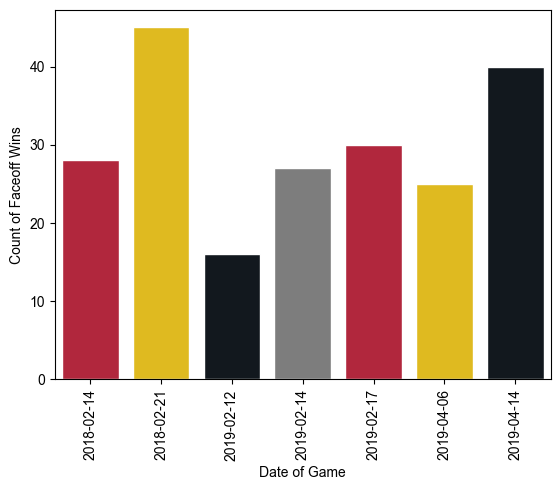

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
plt.xlabel("Date of Game")
plt.ylabel("Count of Faceoff Wins")
flames_cat = ["#C8102E", "#FFCD00", "#101820", "#7D7D7D"]  # red, gold, black, gray, light gray
sns.set_theme(style="whitegrid")
sns.set_palette(flames_cat)
sns.barplot(data=faceoff_counts_df[(faceoff_counts_df["Team"].str.contains("USA"))].groupby("game_date")["Count"].sum().reset_index(), x= "game_date", y="Count", palette=flames_cat, hue="game_date", legend=False)


In [23]:
faceoff_period_zone_counts

,game_date,Team,Zone,Period,Count
0,2018-02-11,Canada,Defensive Zone,1,2
1,2018-02-11,Canada,Defensive Zone,2,2
2,2018-02-11,Canada,Defensive Zone,3,4
3,2018-02-11,Canada,Neutral Zone,1,6
4,2018-02-11,Canada,Neutral Zone,2,7
...,...,...,...,...,...
194,2019-04-14,USA,Neutral Zone,4,2
195,2019-04-14,USA,Offensive Zone,1,5
196,2019-04-14,USA,Offensive Zone,2,6
197,2019-04-14,USA,Offensive Zone,3,3


<Axes: xlabel='game_date', ylabel='count'>

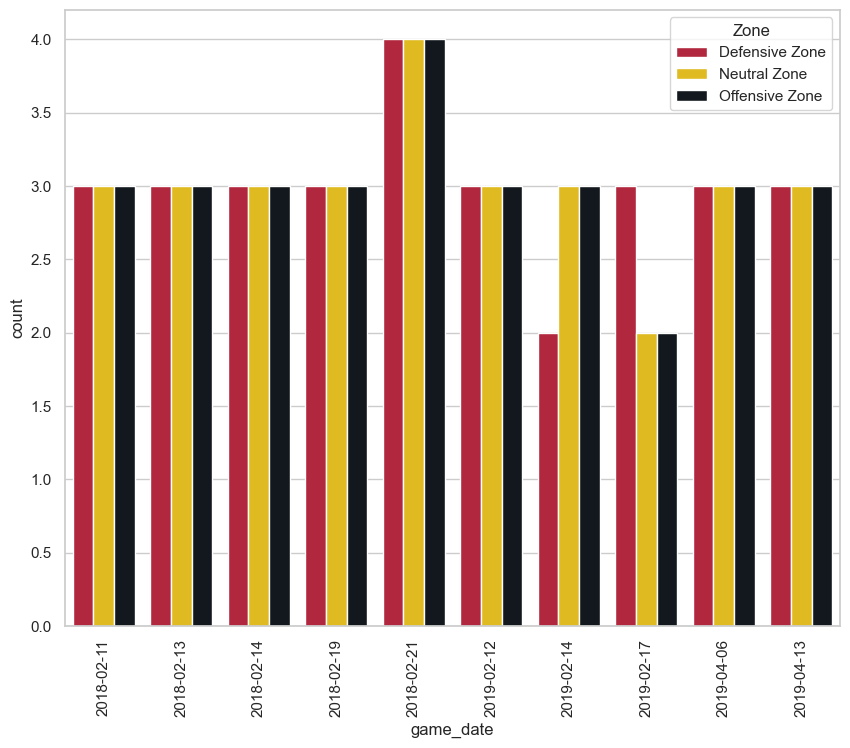

In [26]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
team_faceoff_zone_counts = faceoff_period_zone_counts[faceoff_period_zone_counts["Team"].str.contains("Canada")]
sns.countplot(data=team_faceoff_zone_counts, x="game_date", hue="Zone")

<Axes: xlabel='game_date', ylabel='count'>

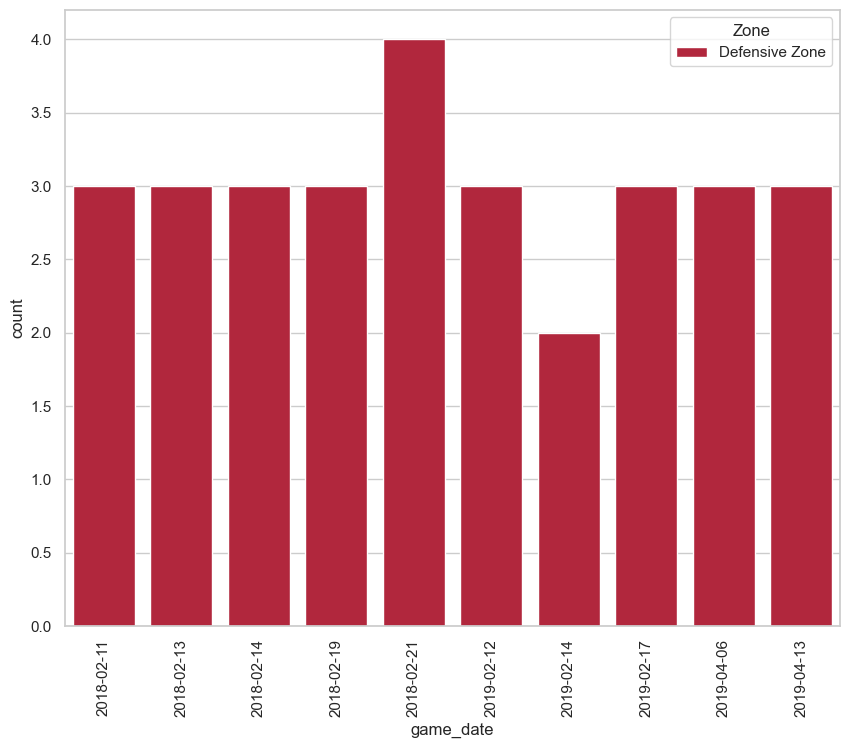

In [27]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
team_zone = (
    faceoff_period_zone_counts["Team"].str.contains("Canada") & 
    faceoff_period_zone_counts["Zone"].str.contains("Defensive")
)
team_faceoff_zone_counts = faceoff_period_zone_counts.loc[team_zone].copy()
sns.countplot(data=team_faceoff_zone_counts, x="game_date", hue="Zone")

In [28]:
faceoff_df["Zone"] = faceoff_df.apply(lambda x: rink_area(x["X Coordinate"]), axis = 1)

faceoff_df.head()

/var/folders/mn/zxv9btt5163290xr8yjc8v5h0000gn/T/ipykernel_27398/3811595792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faceoff_df["Zone"] = faceoff_df.apply(lambda x: rink_area(x["X Coordinate"]), axis = 1)


,game_date,Home Team,Away Team,Period,Home Team Skaters,Away Team Skaters,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,Zone
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Emily Clark,Faceoff Win,100,42,Backhand,NaN,NaN,NaN,Lyudmila Belyakova,Neutral Zone
16,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Canada,Marie-Philip Poulin,Faceoff Win,80,20,Backhand,NaN,NaN,NaN,Yelena Dergachyova,Neutral Zone
38,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Russia,Olga Sosina,Faceoff Win,31,65,Backhand,NaN,NaN,NaN,Melodie Daoust,Defensive Zone
55,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,4,Canada,Brianne Jenner,Faceoff Win,169,64,Backhand,NaN,NaN,NaN,Yevgenia Dyupina,Offensive Zone
112,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,5,5,Russia,Yevgenia Dyupina,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Blayre Turnbull,Offensive Zone


In [29]:
faceoff_zone_zone_counts = faceoff_df.groupby(["game_date","Team", "Zone"]).size().reset_index(name="Count")
faceoff_zone_zone_counts

,game_date,Team,Zone,Count
0,2018-02-11,Canada,Defensive Zone,8
1,2018-02-11,Canada,Neutral Zone,18
2,2018-02-11,Canada,Offensive Zone,16
3,2018-02-11,Russia,Defensive Zone,7
4,2018-02-11,Russia,Neutral Zone,4
...,...,...,...,...
61,2019-04-14,Finland,Neutral Zone,14
62,2019-04-14,Finland,Offensive Zone,5
63,2019-04-14,USA,Defensive Zone,14
64,2019-04-14,USA,Neutral Zone,8


In [30]:
faceoff_zone_zone_counts = faceoff_df.groupby(["game_date","Team", "Zone"]).size().reset_index(name="Count")
team_zone = (
    faceoff_zone_zone_counts["Team"].str.contains("Russia") & 
    faceoff_zone_zone_counts["Zone"].str.contains("Defensive")
)
team_faceoff_zone_counts = faceoff_zone_zone_counts.loc[team_zone].copy()

team_faceoff_zone_counts


,game_date,Team,Zone,Count
3,2018-02-11,Russia,Defensive Zone,7
21,2018-02-19,Russia,Defensive Zone,4


In [32]:
import plotly.tools as tls
import plotly.express as px
from plotly.io import to_html

fig = px.bar(team_faceoff_zone_counts, x="game_date", y="Count", color="Zone",
             barmode="group", title="Faceoff Wins by Zone")

chart_html = to_html(fig, include_plotlyjs="cdn", full_html=False)

fig

In [35]:
#team_counts_per_detail_df["Period"] = team_counts_per_detail_df["Period"].astype("category")
fig = px.bar(team_counts_per_detail_df, x="game_date", y="Count", color="Detail 1",
             barmode="group", title="Zone Entries by Detail")

chart_html = to_html(fig, include_plotlyjs="cdn", full_html=False)

fig

NameError: name 'team_counts_per_detail_df' is not defined